In [49]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mp
import matplotlib.pyplot as plt
import math as m
import sympy as smp
from IPython.display import display as disp
import lablib as ll
%matplotlib inline

Имеющиеся экспериментальные данные:

* $R ↦ t$
* комнатная температура (исходная температура образцов), $R_{ambient}$ (измерение R при комнатной температуре)
* приборные константы:
    * масса образца $m$
    * напряжение на нагревателе $U$
    * ток через нагреватель $I$
    * температурный коэффициент сопротивления материала нагревателя $\alpha$

In [44]:
data = {}
work = {}

kinds = ["empty", "brass", "iron"]
colors = {
    "empty": "black",
    "brass": "#808000",
    "iron": "#800080"
}

constants = ll.read_csv("constants.csv")

for kind in kinds:
    data[kind] = ll.read_csv("measurements/%s.csv" % kind)
    work[kind] = ll.varlist()
    ll.add(work[kind],
           constants,
           ll.read_csv("constants/%s.csv" % kind),
           ll.var("R_ambient", data[kind].R[0], data[kind].Error_R[0]))

for kind in kinds:
    disp("Data for kind %s:" % kind, data[kind])

for kind in kinds:
    disp("Work variables for kind %s:" % kind, work[kind])


'Data for kind empty:'

,R,Error_R,t,Error_t
0,18.144,0.005,0,0.5
1,18.194,0.005,40,0.5
2,18.244,0.005,84,0.5
3,18.294,0.005,129,0.5
4,18.344,0.005,175,0.5
5,18.394,0.005,223,0.5
6,18.444,0.005,273,0.5
7,18.494,0.005,325,0.5
8,18.544,0.005,378,0.5
9,18.594,0.005,433,0.5


'Data for kind brass:'

,R,Error_R,t,Error_t
0,18.146,0.005,0,0.5
1,18.196,0.005,44,0.5
2,18.246,0.005,105,0.5
3,18.296,0.005,172,0.5
4,18.346,0.005,243,0.5
5,18.396,0.005,315,0.5
6,18.446,0.005,389,0.5
7,18.496,0.005,465,0.5
8,18.546,0.005,544,0.5
9,18.596,0.005,624,0.5


'Data for kind iron:'

,R,Error_R,t,Error_t
0,18.147,0.005,0,0.5
1,18.197,0.005,46,0.5
2,18.247,0.005,110,0.5
3,18.297,0.005,180,0.5
4,18.347,0.005,252,0.5
5,18.397,0.005,327,0.5
6,18.497,0.005,482,0.5
7,18.547,0.005,562,0.5
8,18.597,0.005,644,0.5
9,18.647,0.005,728,0.5


'Work variables for kind empty:'

,Value,Error
alpha,0.00428,0.000005
U,36.00000,0.100000
I,0.30000,0.010000
T_ambient,24.00000,1.000000
m,1.00000,0.000000
R_ambient,18.14400,0.005000


'Work variables for kind brass:'

,Value,Error
alpha,0.00428,0.000005
U,36.00000,0.100000
I,0.30000,0.010000
T_ambient,24.00000,1.000000
m,0.87800,0.000100
R_ambient,18.14600,0.005000


'Work variables for kind iron:'

,Value,Error
alpha,0.00428,0.000005
U,36.00000,0.100000
I,0.30000,0.010000
T_ambient,25.00000,1.000000
m,0.81650,0.000100
R_ambient,18.14700,0.005000


Будем считать, что зависимость $t(R)$ имеет вид $t(R) = e^{R/C} + B$.

Выразим теплоёмкость образца в калориметре (вместе с теплоёмкостью калориметра) через значение $\frac{\partial t}{\partial R}_{R = R_{ambient}}$:

$$C = \frac{P - \lambda(T - T_{ambient})}{\partial T / \partial t}$$

при $T = T_{ambient}$,

$$C = \frac{P}{(\partial T / \partial t)_{T = T_{ambient}}}$$

Найдём $\frac{\partial T}{\partial t}$:

$$R(T) = R_0(1 + \alpha \Delta T)$$

$$\frac{\partial R}{\partial t} = R_0 \alpha \frac{\partial T}{\partial t}$$

Итак,

$$C = \frac{P}{\frac{\partial T}{\partial t}_{T = T_{ambient}}} = \frac{P R_0 \alpha}{\frac{\partial R}{\partial t}_{R = R_{ambient}}} = P R_0 \alpha \frac{\partial t}{\partial R}_{R = R_{ambient}}$$

В свою очередь,

$$P R_0 \alpha \frac{\partial t}{\partial R}_{R = R_{ambient}} = \frac{P R_{ambient} \alpha \frac{\partial t}{\partial R}_{R = R_{ambient}}}{1 + \alpha \Delta T_{ambient}}$$

In [45]:
def x(kind):
    return data[kind].R
def xerr(kind):
    return data[kind].Error_R
def y(kind):
    return data[kind].t
def yerr(kind):
    return data[kind].Error_t
def model(x, b, c):
    return m.e**(x/c) + b
def C(dy_dx_at_ambient, U, I, R_ambient, alpha, T_ambient):
    return (U * I * R_ambient * alpha * dy_dx_at_ambient) / (1 + alpha * T_ambient)
    
model_args = ["b", "c"]
model_str = "e^(x/c) + b"

Построим график $t(R)$.

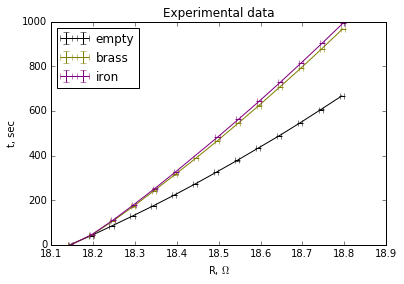

In [46]:
plt.title("Experimental data")
plt.xlabel("R, $\Omega$")
plt.ylabel("t, sec")

for kind in kinds:
    plt.errorbar(x = x(kind), y = y(kind), xerr = xerr(kind), yerr = yerr(kind),
                 label = kind, color = colors[kind])

plt.axis([None, None, 0, None])
plt.legend(loc = "best")

Выполним приближение модельной функции $t(R)$ к экспериментальным данным методом наименьших квадратов и затем Deming regression.

Initial guesses for empty:       Error        Value
b  1.399899 -2127.700154
c  0.000173     2.369040


'Final guesses for empty:'

,Error,Value
b,12.229929,-2122.372718
c,0.001544,2.369706


Initial guesses for brass:       Error        Value
b  1.348299 -2988.088187
c  0.000109     2.269843


'Final guesses for brass:'

,Error,Value
b,25.106852,-2980.249899
c,0.002069,2.270482


Initial guesses for iron:       Error        Value
b  1.348748 -3054.980669
c  0.000106     2.263437


'Final guesses for iron:'

,Error,Value
b,23.259529,-3048.935899
c,0.001860,2.263916


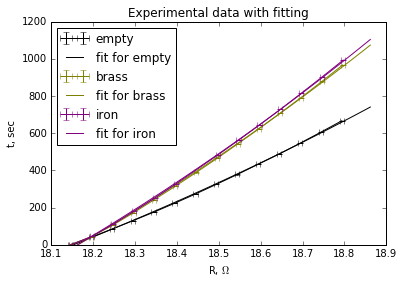

In [47]:
from scipy import optimize as sp_opt
from scipy import odr as sp_odr

for kind in kinds:
    ll.add(work[kind], ll.fit(name = kind,
                              model = model,
                              model_args = model_args,
                              x = x(kind),
                              y = y(kind),
                              xerr = xerr(kind),
                              yerr = yerr(kind)))


plt.title("Experimental data with fitting")
plt.xlabel("R, $\Omega$")
plt.ylabel("t, sec")

x_linspace = ll.linspace([x for x in x(kind) for kind in data])

for kind in kinds:
    plt.errorbar(x = x(kind), y = y(kind), xerr = xerr(kind), yerr = yerr(kind),
                 label = kind, color = colors[kind])
    plt.errorbar(x = x_linspace, y = model(x_linspace, *work[kind].Value[model_args]),
                 label = "fit for %s" % kind, color = colors[kind])

plt.axis([None, None, 0, None])
plt.legend(loc = "best")


Используя полученные коэффициенты, продифференцируем модельную функцию $t(R)$ по $R$ в точке $R_{ambient}$ и подставим значения в основную формулу.

Таким образом найдём полную теплоёмкость пустого калориметра, после чего модифицируем основную формулу и для каждого из образцов будем находить удельную теплоёмкость образца: $c = \frac{C - C_{empty}}{m}$.

In [48]:
sym_x = smp.symbols("x")
sym_args = smp.symbols(model_args)
sym_model = model(sym_x, *sym_args)
dy_dx = smp.diff(sym_model, sym_x)

print("Model: %s" % sym_model)
print("dy/dx: %s" % dy_dx)

#
# Generate final symbolic expression for C.
#

sym_U, sym_I, sym_R_ambient, sym_alpha, sym_T_ambient, sym_m = smp.symbols("U I R_ambient alpha T_ambient m")
sym_C = C(U = sym_U,
          I = sym_I,
          R_ambient = sym_R_ambient,
          alpha = sym_alpha,
          T_ambient = sym_T_ambient,
          dy_dx_at_ambient = dy_dx.subs(sym_x, sym_R_ambient))
print("Symbolic formula for C: %s" % sym_C)

#
# Now compute its error as square root of sum of squares of products of
# partial differentials of C for each variable by absolute error of the corresponding variable.
#

ll.add_multi(work.values(), ll.sym_compute("C_empty", sym_C, work["empty"]))
disp("C for empty:", work["empty"].loc[["C_empty"]])

sym_C_empty = smp.symbols("C_empty")
sym_C = (sym_C - sym_C_empty) / sym_m

for kind in set(kinds) - set(["empty"]):
    ll.add(work[kind], ll.sym_compute("C", sym_C, work[kind]))
    disp("Specific C for %s:" % kind, work[kind].loc[["C"]])
    

Model: 2.71828182845905**(x/c) + b
dy/dx: 1.0*2.71828182845905**(x/c)/c
Symbolic formula for C: 1.0*2.71828182845905**(R_ambient/c)*I*R_ambient*U*alpha/(c*(T_ambient*alpha + 1))


'Error influence estimations for C_empty:'

,Error,Derivative,(E*D)^2
I,0.01,2262.34145075568,511.818883980733
R_ambient,0.005,323.814262157196,2.62139190941023
T_ambient,1,-2.63425567938398,6.93930298436673
U,0.1,18.8528454229640,3.55429780542176
alpha,5e-06,143803.808159227,0.516988381027391
c,0.00154384,-2479.33081796630,14.6512239377455


'C for empty:'

,Value,Error
C_empty,678.702435226705,23.2400965789453


'Error influence estimations for C:'

,Error,Derivative,(E*D)^2
C_empty,23.2400965789453,-1.22473974280465,810.146348522389
I,0.01,4137.96222876486,1712.27314066847
R_ambient,0.005,616.744355204244,9.50933999190746
T_ambient,1,-4.79958762577605,23.0360413775026
U,0.1,34.4830185730405,11.8907856990866
alpha,5e-06,262009.107005855,1.71621930385014
c,0.00185983,-4943.67349599667,84.5367306624790
m,0.0001,-502.332912025735,0.00252338354504255


'Specific C for iron:'

,Value,Error
C,410.154822669013,51.5083598031351


'Error influence estimations for C:'

,Error,Derivative,(E*D)^2
C_empty,23.2400965789453,-1.13895216400911,700.626928304005
I,0.01,3761.74370132253,1415.07156744397
R_ambient,0.005,559.232426114804,7.81852266045625
T_ambient,1,-4.38014991339427,19.1857132638078
U,0.1,31.3478641776877,9.82688588502758
alpha,5e-06,239112.035625069,1.42936413951911
c,0.00206907,-4469.46077084630,85.5187265566156
m,0.0001,-404.912873664065,0.00163954435258891


'Specific C for brass:'

,Value,Error
C,355.513503077049,47.3231375523407
